In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random

import torch
from torch import nn
from torch.utils.data import DataLoader

from fastai.vision.all import *

from datetime import datetime
from scipy.signal import savgol_filter
from scipy.signal import correlate
from sklearn.metrics import mean_squared_error
from IPython.core.magic import register_cell_magic

In [2]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

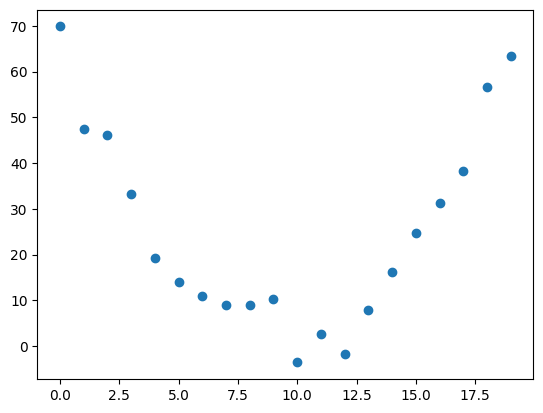

In [3]:
speed = torch.randn(20)*4 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [4]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [5]:
params = torch.randn(3).requires_grad_()

In [6]:
preds = f(time, params)

In [7]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

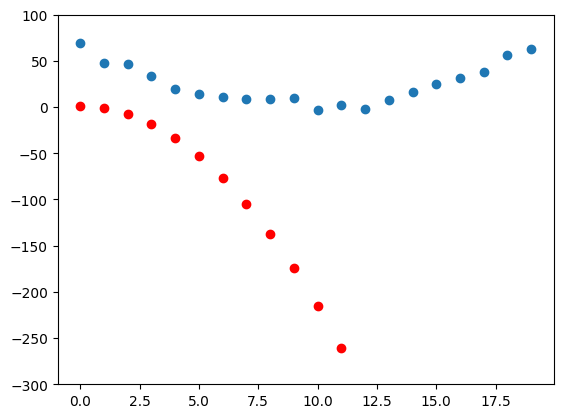

In [8]:
show_preds(preds)

In [9]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [10]:
loss = mse(preds, speed)
loss

tensor(147235.7969, grad_fn=<MeanBackward0>)

In [11]:
loss.backward()

In [12]:
params.grad * 1e-5
params

tensor([-2.1495, -0.1262,  1.1479], requires_grad=True)

In [13]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [14]:
preds = f(time,params)
mse(preds, speed)

tensor(28345.7617, grad_fn=<MeanBackward0>)

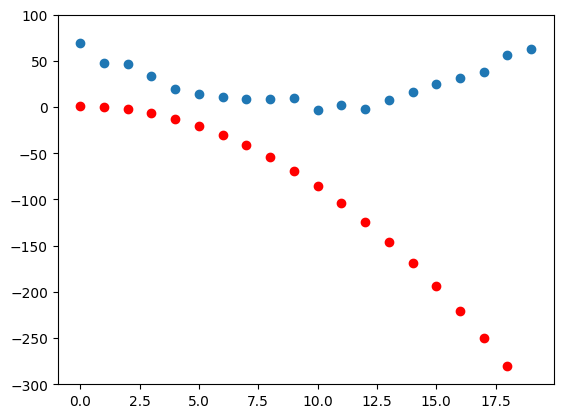

In [15]:
show_preds(preds)

In [16]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [17]:
for i in range(100): apply_step(params)

28345.76171875
5848.13427734375
1590.894775390625
785.2923583984375
632.8452758789062
603.9952392578125
598.5335083007812
597.49755859375
597.2989501953125
597.259033203125
597.2490234375
597.24462890625
597.241455078125
597.2384033203125
597.2353515625
597.2322998046875
597.2293090820312
597.226318359375
597.2232666015625
597.2203369140625
597.2173461914062
597.21435546875
597.2113037109375
597.2083129882812
597.2052612304688
597.2022705078125
597.1993408203125
597.1962280273438
597.1932373046875
597.1902465820312
597.1871948242188
597.1842041015625
597.1812133789062
597.17822265625
597.1751708984375
597.1722412109375
597.169189453125
597.1661376953125
597.1632080078125
597.16015625
597.1571655273438
597.1542358398438
597.151123046875
597.148193359375
597.1451416015625
597.1421508789062
597.13916015625
597.1361083984375
597.1331176757812
597.1300659179688
597.1270751953125
597.1241455078125
597.1210327148438
597.1180419921875
597.1150512695312
597.1121215820312
597.1090698242188
597.1

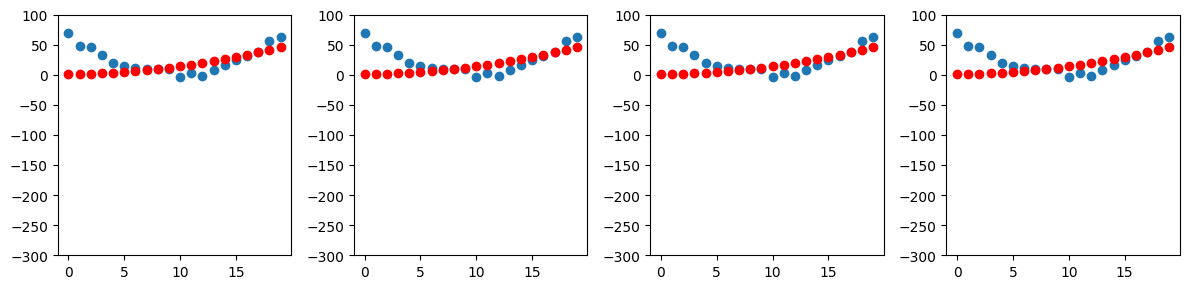

In [24]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [27]:
tensor([1]*10)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
help(torch.where)

Help on built-in function where in module torch:

where(...)
    where(condition, input, other, *, out=None) -> Tensor
    
    Return a tensor of elements selected from either :attr:`input` or :attr:`other`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{input}_i & \text{if } \text{condition}_i \\
            \text{other}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`input`, :attr:`other` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield input, otherwise yield other
        input (Tensor or Scalar): value (if :attr:`input` is a scalar) or values selected at indices
                              where :attr:`condition` is ``True``
        other (Tensor or Scalar): value (if :attr:`other` is a scalar) or values selected at indices
                